In [130]:

import numpy as np

import scipy.stats as stats
import constants as c



# Define .txt file names

In [131]:

case1_evolved_familiar = '10x75_55swarms/case1b_10x75/familiarFits_full.txt'   
case2_evolved_familiar = '10x75_55swarms/case2_10x75/familiarFits.txt'
case3_evolved_familiar = '10x75_55swarms/case3_10x75/familiarFits.txt'

case1_evolved_foreign = '10x75_55swarms/case1b_10x75/foreignFits.txt'
case2_evolved_foreign = '10x75_55swarms/case2_10x75/foreignFits.txt'
case3_evolved_foreign = '10x75_55swarms/case3_10x75/foreignFits.txt'

#-------

case1_random_familiar = '10x75_55swarms/case1b_1x0/familiarFits_full.txt'   
case2_random_familiar = '10x75_55swarms/case2_1x0/familiarFits.txt'
case3_random_familiar = '10x75_55swarms/case3_1x0/familiarFits.txt'

case1_random_foreign = '10x75_55swarms/case1b_1x0/foreignFits.txt'
case2_random_foreign = '10x75_55swarms/case2_1x0/foreignFits.txt'
case3_random_foreign = '10x75_55swarms/case3_1x0/foreignFits.txt'



# Get list of swarm fitnesses for analysis

In [132]:
import numpy as np
from itertools import islice

def Get_Swarm_Fits(fitnessFile, botsPerSwarm, numLinesToRead=None):
    '''
    Parameters:
        - fitnessFile: txt file where each line is a number
        - botsPerSwarm: integer number of bots in each swarm
        - numLinesToRead: optional parameter specifying the number of lines to read from the file

    Returns:
        - None
    '''

    # Read nums from the file
    with open(fitnessFile, 'r') as file:
        lines_to_read = file if numLinesToRead is None else islice(file, numLinesToRead)
        numbers = [float(line.strip()) for line in lines_to_read]   

    # transform data from (-)=more fit to (+)=more fit
    numbers = [num*-1 for num in numbers]

    # check if the length of the list is divisible by botsPerSwarm
    if len(numbers) % botsPerSwarm != 0:
        raise ValueError("Length of the list is not divisible by botsPerSwarm")

    # compute avg of every <botsPerSwarm> lines
    bestOfEachSwarm = [np.max(numbers[i:i+botsPerSwarm]) for i in range(0, len(numbers), botsPerSwarm)]

    return bestOfEachSwarm



    


In [133]:
# Use function on each .txt file to get a list of swarm fitnesses for each file

case1_evolved_familiar = Get_Swarm_Fits(case1_evolved_familiar, c.botsPerSwarm, 550)
case2_evolved_familiar = Get_Swarm_Fits(case2_evolved_familiar, c.botsPerSwarm, 550)
case3_evolved_familiar = Get_Swarm_Fits(case3_evolved_familiar, c.botsPerSwarm, 550)

case1_evolved_foreign = Get_Swarm_Fits(case1_evolved_foreign, c.botsPerSwarm, 550)
case2_evolved_foreign = Get_Swarm_Fits(case2_evolved_foreign, c.botsPerSwarm, 550)
case3_evolved_foreign = Get_Swarm_Fits(case3_evolved_foreign, c.botsPerSwarm, 550)

#-------

case1_random_familiar = Get_Swarm_Fits(case1_random_familiar, c.botsPerSwarm, 550)
case2_random_familiar = Get_Swarm_Fits(case2_random_familiar, c.botsPerSwarm, 550)
case3_random_familiar = Get_Swarm_Fits(case3_random_familiar, c.botsPerSwarm, 550)

case1_random_foreign = Get_Swarm_Fits(case1_random_foreign, c.botsPerSwarm, 550)
case2_random_foreign = Get_Swarm_Fits(case2_random_foreign, c.botsPerSwarm, 550)
case3_random_foreign = Get_Swarm_Fits(case3_random_foreign, c.botsPerSwarm, 550)


# Perform Shapiro-Wilks test to determine if data is normally distributed

In [134]:
from scipy.stats import shapiro

def Check_Normal_Distribution(data):
    # Perform Shapiro-Wilk test
    stat, p_value = shapiro(data)
    
    # Check the p-value
    alpha = 0.05                        # significance level
    if p_value > alpha:
        print("The data is normally distributed")
    else:
        print("The data is not normally distributed")


In [135]:
## Use function on each "average swarm" list


## Check if case1 swarm fitnesses are normally distributed
Check_Normal_Distribution(case1_evolved_foreign)
Check_Normal_Distribution(case1_evolved_familiar)

Check_Normal_Distribution(case1_random_foreign)
Check_Normal_Distribution(case1_random_familiar)


## Check if case2 swarm fitnesses are normally distributed
Check_Normal_Distribution(case2_evolved_foreign)
Check_Normal_Distribution(case2_evolved_familiar)

Check_Normal_Distribution(case2_random_foreign)
Check_Normal_Distribution(case2_random_familiar)


## Check if case3 swarm fitnesses are normally distributed
Check_Normal_Distribution(case3_evolved_foreign)
Check_Normal_Distribution(case3_evolved_familiar)

Check_Normal_Distribution(case3_random_foreign)
Check_Normal_Distribution(case3_random_familiar)




The data is normally distributed
The data is normally distributed
The data is normally distributed
The data is not normally distributed
The data is normally distributed
The data is not normally distributed
The data is normally distributed
The data is not normally distributed
The data is normally distributed
The data is normally distributed
The data is not normally distributed
The data is not normally distributed


# Perform Mann Whitney U Test / T-test 
MW- U is not normally distributed. T-test if it is.

In [136]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(list1, list2, alpha=0.05):
    """
    Perform Mann-Whitney U test to determine if there is a significant difference between two lists.

    Parameters:
        - list1: First list of values
        - list2: Second list of values
        - alpha: Significance level for the test (default is 0.05)

    Returns:
        - None
    """

    # Perform Mann-Whitney U test
    statistic, p_value = mannwhitneyu(list1, list2)

    # Check if the result is significant
    is_significant = p_value < alpha

    # Print information
    print(f"t statistic: {statistic:.5f}, p-value: {p_value},  alpha: {alpha}, {'significant' if is_significant else 'not significant'}")
    return p_value


from scipy.stats import ttest_ind

def t_test(list1, list2, alpha=0.05):
    """
    Perform independent samples t-test to determine if there is a significant difference between two lists.

    Parameters:
        - list1: First list of values
        - list2: Second list of values
        - alpha: Significance level for the test (default is 0.05)

    Returns:
        - None
    """

    # Perform independent samples t-test
    statistic, p_value = ttest_ind(list1, list2)

    # Check if the result is significant
    is_significant = p_value < alpha

    # Print information
    print(f"t statistic: {statistic:.5f}, p-value: {p_value}, alpha: {alpha}, {'significant' if is_significant else 'not significant'}")
    return p_value



# Perfom t-Test on (all evolved foreign data)
To determine which swarm does better when evolved and deployed to a cluttered environment

In [137]:
# print('----case1 vs case2----')
# mann_whitney_u_test(case1_evolved_foreign, case2_evolved_foreign, 0.05/3)              Josh said we don't need this. We just care about how case3 does relative to others


print('----case1 vs case3----')
mann_whitney_u_test(case1_evolved_foreign, case3_evolved_foreign, 0.05/2)


print('----case2 vs case3----')
mann_whitney_u_test(case2_evolved_foreign, case3_evolved_foreign, 0.05/2)





----case1 vs case3----
t statistic: 292.00000, p-value: 3.023707327242668e-13,  alpha: 0.025, significant
----case2 vs case3----
t statistic: 933.00000, p-value: 0.0005374816311602938,  alpha: 0.025, significant


0.0005374816311602938

# Perform t-Test on (all evolved familiar data)
To determine which swarm does better when evolved and deployed to an empty environment

In [138]:
# print('----case1 vs case2----')
# mann_whitney_u_test(case1_evolved_familiar, case2_evolved_familiar, 0.05/3)


print('----case1 vs case3----')
mann_whitney_u_test(case1_evolved_familiar, case3_evolved_familiar, 0.05/2)


print('----case2 vs case3----')
mann_whitney_u_test(case2_evolved_familiar, case3_evolved_familiar, 0.05/2)




----case1 vs case3----
t statistic: 58.00000, p-value: 3.5541615285662444e-18,  alpha: 0.025, significant
----case2 vs case3----
t statistic: 781.00000, p-value: 1.242328873992372e-05,  alpha: 0.025, significant


1.242328873992372e-05

# Perfom MW U Test (evolved_foreign vs random_foreign)
To show that bots were evolved enough that they do better than a random bot in the foreign environment
We do MW-U here because all random data is not normally distributed, so any tests involving them need to be MW

In [139]:
mann_whitney_u_test(case1_evolved_foreign, case1_random_foreign, 0.05)        # What should significance level be? 0.5?
mann_whitney_u_test(case2_evolved_foreign, case2_random_foreign, 0.05)
mann_whitney_u_test(case3_evolved_foreign, case3_random_foreign, 0.05)



t statistic: 2608.00000, p-value: 5.907138824129843e-11,  alpha: 0.05, significant
t statistic: 3002.00000, p-value: 5.511787041731709e-19,  alpha: 0.05, significant
t statistic: 3019.00000, p-value: 2.1945959470152095e-19,  alpha: 0.05, significant


2.1945959470152095e-19

# Perform MW U Test (evolved_foreign vs evolved_familiar)
To show that foreign environment is hard enough to pose a significant challenge relative to the familiar environment

In [140]:
mann_whitney_u_test(case1_evolved_foreign, case1_evolved_familiar, 0.05)
mann_whitney_u_test(case2_evolved_foreign, case2_evolved_familiar, 0.05)
mann_whitney_u_test(case3_evolved_foreign, case3_evolved_familiar, 0.05)



t statistic: 558.00000, p-value: 1.1761317269124257e-08,  alpha: 0.05, significant
t statistic: 174.00000, p-value: 1.2568045021901076e-15,  alpha: 0.05, significant
t statistic: 188.00000, p-value: 2.47125994778135e-15,  alpha: 0.05, significant


2.47125994778135e-15

# Table of evolved foreign comparison

In [141]:
def generate_latex_table(stat_test_function, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_random_foreign, case2_random_foreign, case3_random_foreign, alpha=0.05):
    table = r"""
\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & Environment & {p-value} \\
    \midrule
    """

    # Helper function to add rows to the table
    def add_row(comparison, resources, environment, p_value):
        nonlocal table
        table += f"{comparison} & {resources} & {environment} & {p_value:.3e} \\\\\n"

    # Perform T-tests and add rows to the table
    add_row("Case 1 vs. Case 3", "10 x 75", "Foreign", stat_test_function(case1_evolved_foreign, case3_evolved_foreign))
    add_row("Case 2 vs. Case 3", "10 x 75", "Foreign", stat_test_function(case2_evolved_foreign, case3_evolved_foreign))

    # add_row("Case1 vs. Case3", "10 x 75", "Familiar", t_test_function(case1_evolved_familiar, case3_evolved_familiar, alpha))
    # add_row("Case2 vs. Case3", "10 x 75", "Familiar", t_test_function(case2_evolved_familiar, case3_evolved_familiar, alpha))

    # add_row("Case1 vs. Case3", "1 x 0", "Foreign", t_test_function(case1_random_foreign, case3_random_foreign, alpha))
    # add_row("Case2 vs. Case3", "1 x 0", "Foreign", t_test_function(case2_random_foreign, case3_random_foreign, alpha))

    # add_row("Case1 vs. Case3", "1 x 0", "Familiar", t_test_function(case1_random_familiar, case3_random_familiar, alpha))
    # add_row("Case2 vs. Case3", "1 x 0", "Familiar", t_test_function(case2_random_familiar, case3_random_familiar, alpha))


    table += r"""
    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons between average swarm fitness between swarm types in the foreign environment. Swarm fitnesses were averaged over 55 trials. Each robot of a swarm utilized 10 parents and 75 generations for its evolution. Both comparisons revealed a statistically significant difference with a significance level of 0.025.}
\end{table}
    """

    return table


table1 = generate_latex_table(mann_whitney_u_test, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, alpha=0.05/2)

print(table1)


t statistic: 292.00000, p-value: 3.023707327242668e-13,  alpha: 0.05, significant
t statistic: 933.00000, p-value: 0.0005374816311602938,  alpha: 0.05, significant

\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & Environment & {p-value} \\
    \midrule
    Case 1 vs. Case 3 & 10 x 75 & Foreign & 3.024e-13 \\
Case 2 vs. Case 3 & 10 x 75 & Foreign & 5.375e-04 \\

    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons between average swarm fitness between swarm types in the foreign environment. Swarm fitnesses were averaged over 55 trials. Each robot of a swarm utilized 10 parents and 75 generations for its evolution. Both comparisons revealed a statistically significant difference with a significance level of 0.025.}
\end{table}
    


# Table of Evolution > Random in cluttered environment
To show that we have sufficient evolutionary resources that the robots do better than random in a cluttered environment

In [149]:
def generate_latex_table(stat_test_function, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_random_foreign, case2_random_foreign, case3_random_foreign, alpha=0.05):
    table = r"""
\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & Environment & {p-value} \\
    \midrule
    """

    # Helper function to add rows to the table
    def add_row(comparison, environment, p_value):
        nonlocal table
        table += f"{comparison} & {environment} & {p_value:.3e} \\\\\n"

    # Perform T-tests and add rows to the table
    add_row("Case 3 (Evolved) vs. Case 3 (Random)", "Foreign", stat_test_function(case3_evolved_foreign, case3_random_familiar, alpha))
    add_row("Case 2 (Evolved) vs. Case 2 (Random)", "Foreign", stat_test_function(case2_evolved_foreign, case2_random_familiar, alpha))
    add_row("Case 1 (Evolved) vs. Case 1 (Random)", "Foreign", stat_test_function(case1_evolved_foreign, case1_random_familiar, alpha))

    # add_row("Case1 vs. Case3", "10x75", "Familiar", t_test_function(case1_evolved_familiar, case3_evolved_familiar, alpha))
    # add_row("Case2 vs. Case3", "10x75", "Familiar", t_test_function(case2_evolved_familiar, case3_evolved_familiar, alpha))

    # add_row("Case1 vs. Case3", "1x0", "Foreign", t_test_function(case1_random_foreign, case3_random_foreign, alpha))
    # add_row("Case2 vs. Case3", "1x0", "Foreign", t_test_function(case2_random_foreign, case3_random_foreign, alpha))

    # add_row("Case1 vs. Case3", "1x0", "Familiar", t_test_function(case1_random_familiar, case3_random_familiar, alpha))
    # add_row("Case2 vs. Case3", "1x0", "Familiar", t_test_function(case2_random_familiar, case3_random_familiar, alpha))


    table += r"""
    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons of average swarm fitness between swarms of the same type in different environments with the same evolution resources. Each robot utilized 10 parents and 75 generations for its evolution. Swarm fitnesses were averaged over 30 trials. Each comparison revealed a statistically significant difference using a t-test with a significance level of 0.05}
\end{table}
    """

    return table

# Use MW-U here because random data is not normally distributed
table1 = generate_latex_table(mann_whitney_u_test, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, alpha=0.05)

print(table1)

t statistic: 3019.00000, p-value: 2.1945959470152095e-19,  alpha: 0.05, significant
t statistic: 2998.00000, p-value: 6.835199535615881e-19,  alpha: 0.05, significant
t statistic: 2430.00000, p-value: 4.206418292634863e-08,  alpha: 0.05, significant

\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & Environment & {p-value} \\
    \midrule
    Case 3 (Evolved) vs. Case 3 (Random) & Foreign & 2.195e-19 \\
Case 2 (Evolved) vs. Case 2 (Random) & Foreign & 6.835e-19 \\
Case 1 (Evolved) vs. Case 1 (Random) & Foreign & 4.206e-08 \\

    \bottomrule
    \end{tabular}
    \caption{Depicted are statistical comparisons of average swarm fitness between swarms of the same type in different environments with the same evolution resources. Each robot utilized 10 parents and 75 generations for its evolution. Swarm fitnesses were averaged over 30 trials. Each comparison revealed a statistically significant difference using a t-test with a significance le

# Table of foreign_evolved < familiar_evolved in cluttered environment
To show that the environment provided a significant challenge

In [150]:
def generate_latex_table(stat_test_function, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_random_foreign, case2_random_foreign, case3_random_foreign, alpha=0.05):
    table = r"""
\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & {p-value} \\
    \midrule
    """

    # Helper function to add rows to the table
    def add_row(comparison, resources, p_value):
        nonlocal table
        table += f"{comparison} & {resources} & {p_value:.3e} \\\\\n"

    # Perform T-tests and add rows to the table
    add_row("Case 3 (Foreign) vs. Case 3 (Familiar)", "10 x 75", stat_test_function(case3_evolved_foreign, case3_evolved_familiar, alpha))
    add_row("Case 2 (Foreign) vs. Case 2 (Familiar)", "10 x 75", stat_test_function(case2_evolved_foreign, case2_evolved_familiar, alpha))
    add_row("Case 1 (Foreign) vs. Case 1 (Familiar)", "10 x 75", stat_test_function(case1_evolved_foreign, case1_evolved_familiar, alpha))

    # add_row("Case1 vs. Case3", "10x75", "Familiar", t_test_function(case1_evolved_familiar, case3_evolved_familiar, alpha))
    # add_row("Case2 vs. Case3", "10x75", "Familiar", t_test_function(case2_evolved_familiar, case3_evolved_familiar, alpha))

    # add_row("Case1 vs. Case3", "1x0", "Foreign", t_test_function(case1_random_foreign, case3_random_foreign, alpha))
    # add_row("Case2 vs. Case3", "1x0", "Foreign", t_test_function(case2_random_foreign, case3_random_foreign, alpha))

    # add_row("Case1 vs. Case3", "1x0", "Familiar", t_test_function(case1_random_familiar, case3_random_familiar, alpha))
    # add_row("Case2 vs. Case3", "1x0", "Familiar", t_test_function(case2_random_familiar, case3_random_familiar, alpha))


    table += r"""
    \bottomrule
    \end{tabular}
    \caption{Statistical Comparisons between Evolved Swarms in Different Environments}
\end{table}
    """

    return table


table1 = generate_latex_table(mann_whitney_u_test, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, case1_evolved_familiar, case2_evolved_familiar, case3_evolved_familiar, alpha=0.05)

print(table1)

t statistic: 188.00000, p-value: 2.47125994778135e-15,  alpha: 0.05, significant
t statistic: 174.00000, p-value: 1.2568045021901076e-15,  alpha: 0.05, significant
t statistic: 558.00000, p-value: 1.1761317269124257e-08,  alpha: 0.05, significant

\begin{table}[htbp]
    \centering
    \begin{tabular}{l c c c}
    \toprule
    Swarm Comparison & \multicolumn{1}{c}{\begin{tabular}{c}Evolution Resources\\(P x G)\end{tabular}} & {p-value} \\
    \midrule
    Case 3 (Foreign) vs. Case 3 (Familiar) & 10 x 75 & 2.471e-15 \\
Case 2 (Foreign) vs. Case 2 (Familiar) & 10 x 75 & 1.257e-15 \\
Case 1 (Foreign) vs. Case 1 (Familiar) & 10 x 75 & 1.176e-08 \\

    \bottomrule
    \end{tabular}
    \caption{Statistical Comparisons between Evolved Swarms in Different Environments}
\end{table}
    


# Generate box plots

In [144]:
import matplotlib.pyplot as plt
import numpy as np

def side_by_side_bar_chart(*lists, labels=None, title=None, yaxis=(0,10)):
    """
    Generate side-by-side bar chart with error bars

    Parameters:
    - *lists: variable number of lists to plot.
    - labels: optional list of labels for each bar.

    Returns:
    - None 
    """
    # Check if labels are provided, otherwise use default labels
    if labels is None:
        labels = [f'Case {i+1}' for i in range(len(lists))]

    # Calculate the average and standard deviation of each list
    averages = [np.mean(lst) for lst in lists]
    std_devs = [np.std(lst) for lst in lists]

    # Generate positions for the bars
    positions = np.arange(len(labels))

    # Create side-by-side bar chart with average heights and error bars
    plt.bar(positions, height=averages, yerr=std_devs, capsize=5, tick_label=labels)

    # Add labels and title
    plt.ylim(yaxis)
    plt.xlabel('')
    plt.ylabel('Average Fitness')
    plt.title(title)

    # Show the plot
    plt.show()






# Generate box plot (all evolved foreign data)

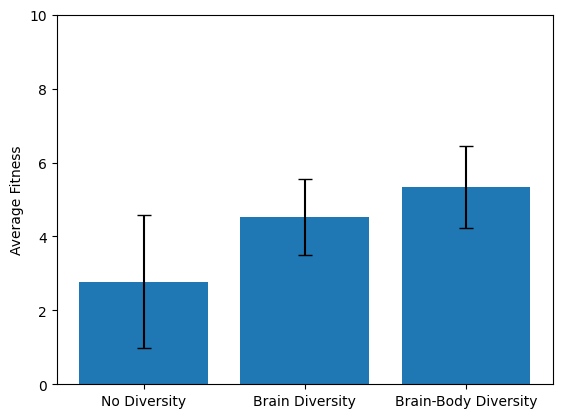

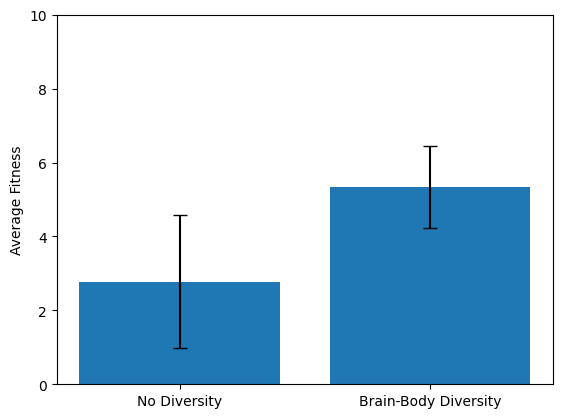

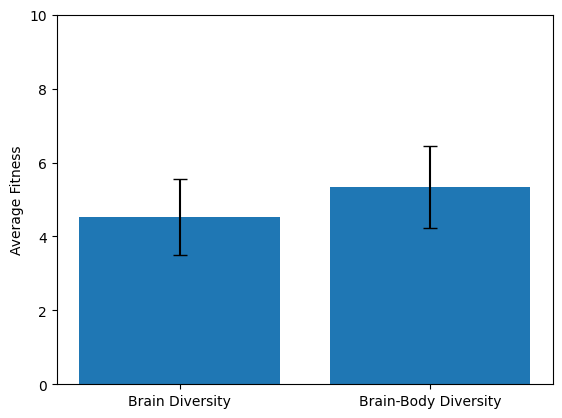

In [145]:
# Box plot for case1_evolved_foregin vs case2_evolved_foreign vs case3_evolved_foreign
side_by_side_bar_chart(case1_evolved_foreign,case2_evolved_foreign ,case3_evolved_foreign, labels=['No Diversity', 'Brain Diversity', 'Brain-Body Diversity'])
side_by_side_bar_chart(case1_evolved_foreign,case3_evolved_foreign, labels=['No Diversity','Brain-Body Diversity'])
side_by_side_bar_chart(case2_evolved_foreign,case3_evolved_foreign, labels=['Brain Diversity','Brain-Body Diversity'])

# Generate box plot (all evolved familiar data)
To determine which swarm does best when evolved and deployed to an empty environment

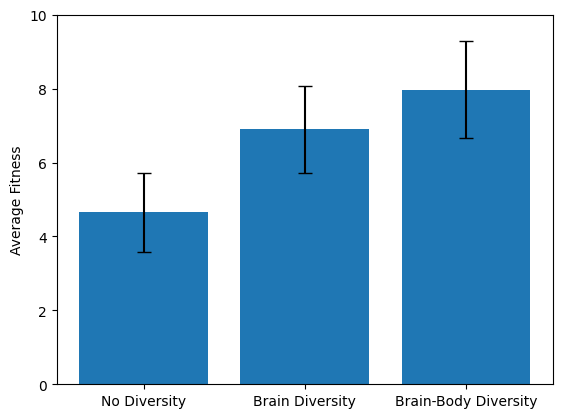

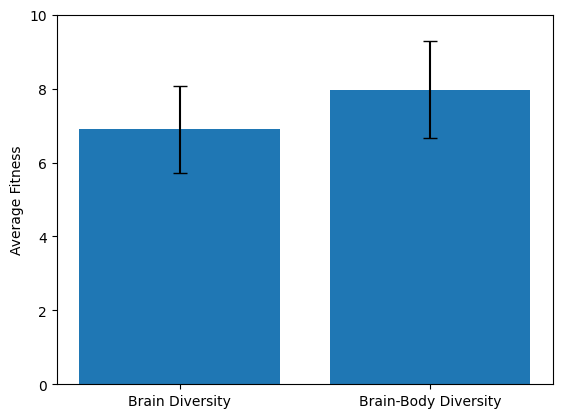

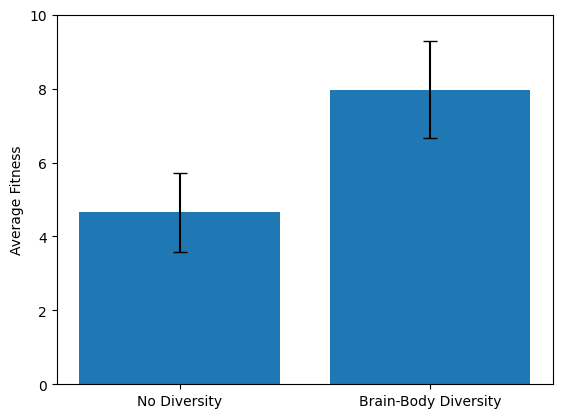

In [146]:
side_by_side_bar_chart(case1_evolved_familiar,case2_evolved_familiar ,case3_evolved_familiar, labels=['No Diversity', 'Brain Diversity', 'Brain-Body Diversity'])
side_by_side_bar_chart(case2_evolved_familiar ,case3_evolved_familiar, labels=['Brain Diversity', 'Brain-Body Diversity'])
side_by_side_bar_chart(case1_evolved_familiar,case3_evolved_familiar, labels=['No Diversity','Brain-Body Diversity'])

# Generate box plot (evolved_foreign vs random_foreign)

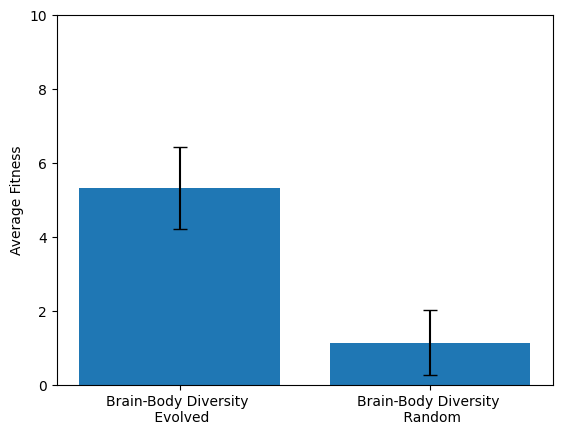

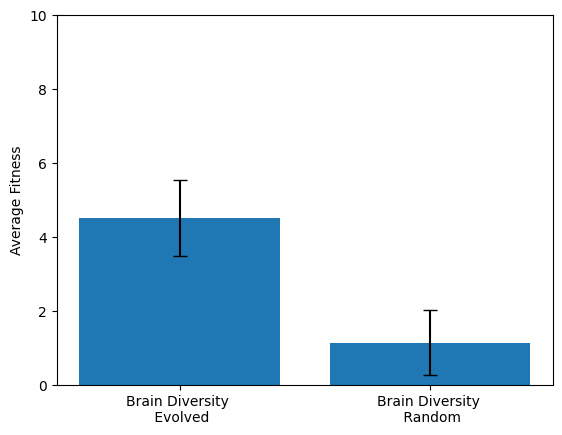

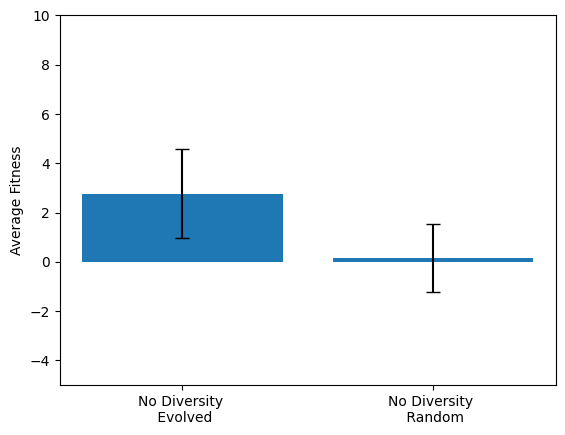

In [147]:
side_by_side_bar_chart(case3_evolved_foreign, case3_random_foreign, labels=['Brain-Body Diversity \n Evolved', 'Brain-Body Diversity \n Random'])
side_by_side_bar_chart(case2_evolved_foreign, case2_random_foreign, labels=['Brain Diversity \n Evolved', 'Brain Diversity \n Random'])
side_by_side_bar_chart(case1_evolved_foreign, case1_random_foreign, labels=['No Diversity \n Evolved', 'No Diversity \n Random'], yaxis=(-5,10))



# Generate box plot (evolved_foreign vs evolved_familiar)

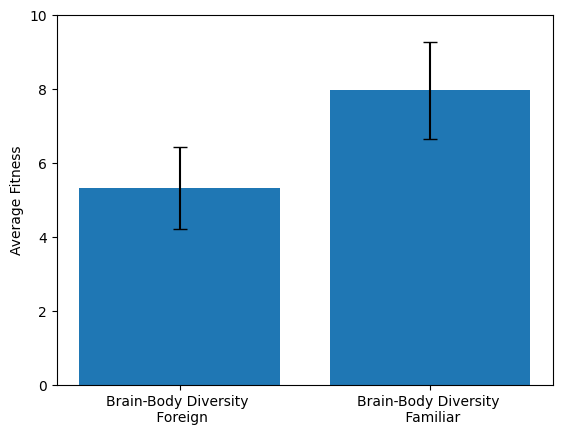

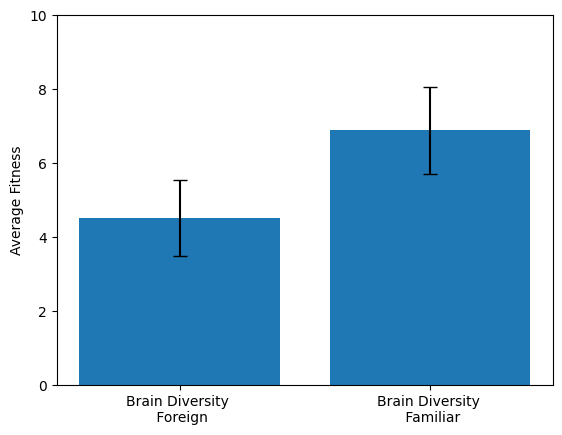

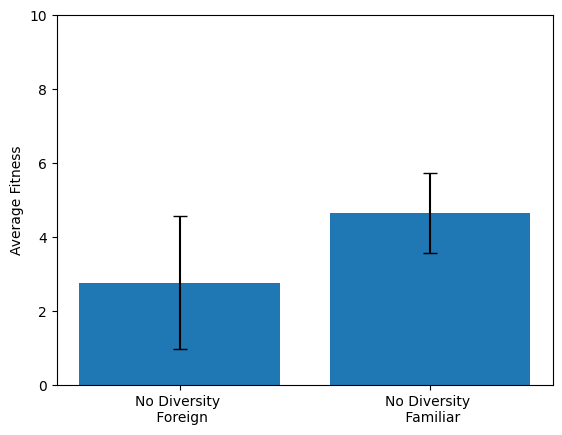

In [148]:
side_by_side_bar_chart(case3_evolved_foreign, case3_evolved_familiar, labels=['Brain-Body Diversity \n Foreign', 'Brain-Body Diversity \n Familiar'])
side_by_side_bar_chart(case2_evolved_foreign, case2_evolved_familiar, labels=['Brain Diversity \n Foreign', 'Brain Diversity \n Familiar'])
side_by_side_bar_chart(case1_evolved_foreign, case1_evolved_familiar, labels=['No Diversity \n Foreign', 'No Diversity \n Familiar'])
